Ratio analysis (1.1)

In [ ]:
# Given data extracted from financial statements
net_sales_2023 = 383285  # in million USD
net_income_2023 = 96995  # in million USD
total_current_assets_2023 = 143566  # in million USD
total_assets_2023 = 352583  # in million USD
total_current_liabilities_2023 = 145308  # in million USD
total_liabilities_2023 = 290437  # in million USD
total_shareholders_equity_2023 = 62146  # in million USD
inventories_2023 = 6331  # in million USD

# Calculating the specified financial ratios
net_profit_margin = (net_income_2023 / net_sales_2023) * 100
roa = (net_income_2023 / total_assets_2023) * 100
roe = (net_income_2023 / total_shareholders_equity_2023) * 100
current_ratio = total_current_assets_2023 / total_current_liabilities_2023
quick_ratio = (total_current_assets_2023 - inventories_2023) / total_current_liabilities_2023
debt_to_equity_ratio = total_liabilities_2023 / total_shareholders_equity_2023

net_profit_margin, roa, roe, current_ratio, quick_ratio, debt_to_equity_ratio


(25.30623426432028,
 27.509834563776476,
 156.07601454639075,
 0.9880116717592975,
 0.9444421504665951,
 4.673462491552152)

In [ ]:
# Calculation of the Dividend Payout Ratio
total_dividends_paid_2023 = 14996  # in million USD
dividend_payout_ratio = total_dividends_paid_2023 / net_income_2023

# Calculation of the Sustainable Growth Rate (SGR)
# SGR = ROE * (1 - Dividend Payout Ratio)
sgr = roe / 100 * (1 - dividend_payout_ratio)  # ROE was previously calculated as a percentage

dividend_payout_ratio, sgr


(0.15460590752100623, 1.3194574067518423)

CAPM calc Rm(1.2)

In [ ]:
# S&P 500 total returns for the last 10 years, starting from 2014 to 2023
sp500_returns = [13.69, 1.38, 11.96, 21.83, -4.38, 31.49, 18.40, 28.71, -18.11, 26.29]

# Calculating the average return over these 10 years
average_sp500_return = sum(sp500_returns) / len(sp500_returns)

average_sp500_return


13.126000000000001

CAPM (1.3)

In [ ]:
# CAPM components
R_f = 4.36 / 100  # Convert percentage to decimal
beta = 1.28
E_R_m = 13.126 / 100  # Convert percentage to decimal

# CAPM calculation for expected return on equity
E_R_i = R_f + beta * (E_R_m - R_f)

E_R_i_percentage = E_R_i * 100  # Convert back to percentage
E_R_i_percentage


15.58048

WACC (1.4)

In [ ]:
# Let's proceed with the WACC calculation using the provided and assumed data

current_stock_price = 168.79  # Current stock price
shares_outstanding_in_thousands = 15550061  # Shares outstanding in thousands
total_debt_million = 106572  # Total debt in million USD
corporate_tax_rate = 0.147  # Corporate tax rate for (AAPL)
risk_free_rate_decimal = 4.36 / 100  # Risk-free rate in decimal
beta_value = 1.28  # Beta value
market_return_decimal = 13.126 / 100  # Market return in decimal
cost_of_debt_decimal = 2.35 / 100  # Assumed cost of debt in decimal

# Calculate Total Market Value of Equity (E) in million USD
total_market_value_equity = current_stock_price * shares_outstanding_in_thousands / 1000

# Calculate the firm's total value (V = E + D)
total_firm_value = total_market_value_equity + total_debt_million

# Calculate the Cost of Equity using CAPM
cost_of_equity = risk_free_rate_decimal + beta_value * (market_return_decimal - risk_free_rate_decimal)

# Calculate WACC
WACC = ((total_market_value_equity / total_firm_value) * cost_of_equity) + \
       ((total_debt_million / total_firm_value) * cost_of_debt_decimal * (1 - corporate_tax_rate))

total_market_value_equity, total_firm_value, cost_of_equity, WACC


(2624694.79619, 2731266.79619, 0.1558048, 0.1505075730356542)

SMA (1.5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-11-b9f6b82ea995>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Signal'][20:] = np.where(df['SMA_20'][20:] > df['SMA_50'][20:], 1.0, 0.0)


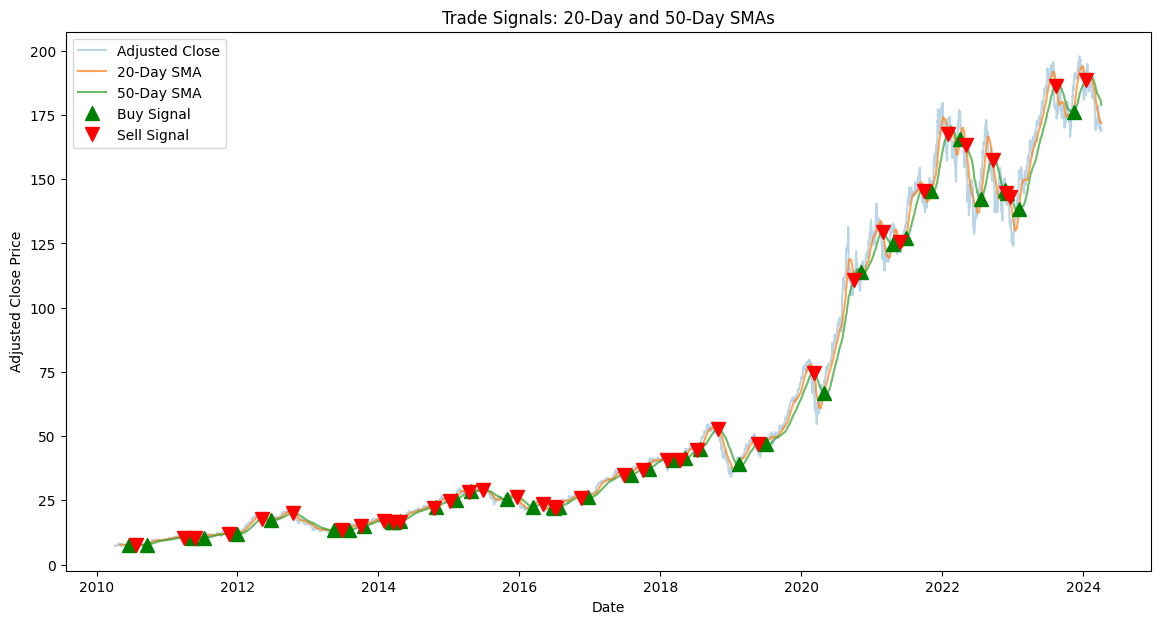

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/AAPL.csv'

df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate SMAs
df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()

# Identify signals
df['Signal'] = 0.0
df['Signal'][20:] = np.where(df['SMA_20'][20:] > df['SMA_50'][20:], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'], label='Adjusted Close', alpha=0.3)
plt.plot(df['SMA_20'], label='20-Day SMA', alpha=0.7)
plt.plot(df['SMA_50'], label='50-Day SMA', alpha=0.7)

# Plot Buy signals
plt.plot(df[df['Position'] == 1].index,
         df['SMA_20'][df['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell signals
plt.plot(df[df['Position'] == -1].index,
         df['SMA_20'][df['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Trade Signals: 20-Day and 50-Day SMAs')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


EMA (1.6)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


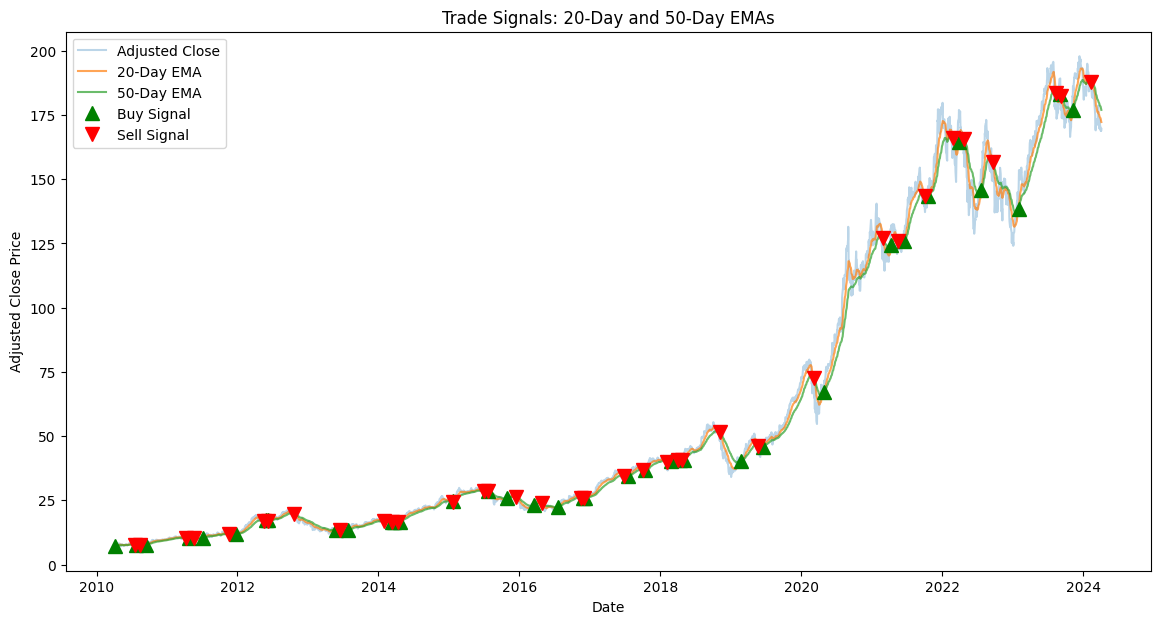

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/AAPL.csv'

df = pd.read_csv(path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate EMAs
df['EMA_20'] = df['Adj Close'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['Adj Close'].ewm(span=50, adjust=False).mean()

# Identify signals
df['Signal'] = 0.0
df['Signal'] = np.where(df['EMA_20'] > df['EMA_50'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'], label='Adjusted Close', alpha=0.3)
plt.plot(df['EMA_20'], label='20-Day EMA', alpha=0.7)
plt.plot(df['EMA_50'], label='50-Day EMA', alpha=0.7)

# Plot Buy signals
plt.plot(df[df['Position'] == 1].index,
         df['EMA_20'][df['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell signals
plt.plot(df[df['Position'] == -1].index,
         df['EMA_20'][df['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Trade Signals: 20-Day and 50-Day EMAs')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()


Monte carlo simulation (1.7)

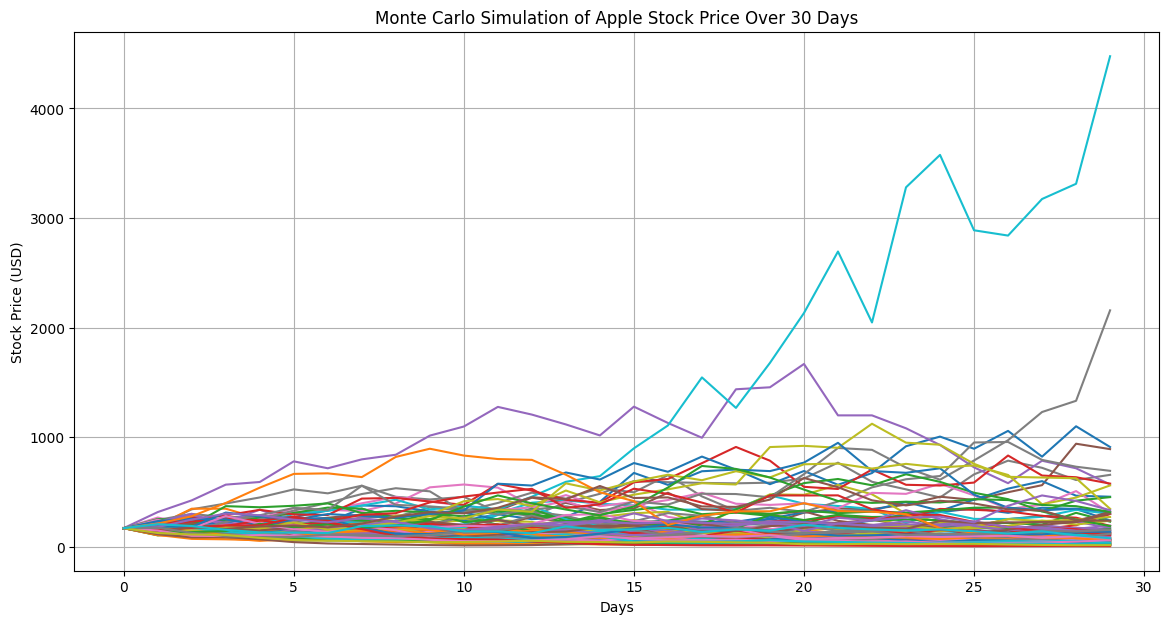

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
S0 = 168.79  # Current stock price in USD
sigma = 0.2069  # Annualized volatility (20.69%)
net_profit_margin_annual = 0.2531  # Approximated from net profit margin
trading_days = 252  # Typical number of trading days in a year
mu = (net_profit_margin_annual - 0.02) / trading_days  # Drift, adjusted for a simple risk-free rate

T = 30  # Forecast time frame in days
N = 100  # Number of simulations

# Daily returns simulation
daily_returns = np.exp((mu - 0.5 * sigma**2) + sigma * np.random.normal(0, 1, (T, N)))

# Stock price forecast
price_paths = np.zeros_like(daily_returns)
price_paths[0] = S0
for t in range(1, T):
    price_paths[t] = price_paths[t - 1] * daily_returns[t]

# Plotting the simulation results
plt.figure(figsize=(14, 7))
plt.plot(price_paths)
plt.title("Monte Carlo Simulation of Apple Stock Price Over 30 Days")
plt.xlabel("Days")
plt.ylabel("Stock Price (USD)")
plt.grid(True)
plt.show()


FB Prophet (1.8)

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Colab Notebooks/AAPL.csv'

df = pd.read_csv(path)


Mounted at /content/drive


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-04-06,8.507143,8.580000,8.464286,8.555000,7.242659,447017200
1,2010-04-07,8.555357,8.640000,8.523571,8.592857,7.274707,628502000
2,2010-04-08,8.587143,8.626429,8.501429,8.569643,7.255055,572989200
3,2010-04-09,8.622500,8.638929,8.587857,8.635357,7.310689,334182800
4,2010-04-12,8.650000,8.681071,8.636071,8.653214,7.325806,333026400


In [ ]:
df_prophet = df[['Date', 'Adj Close']].rename(columns={'Date': 'ds', 'Adj Close': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])


DEBUG:cmdstanpy:input tempfile: /tmp/tmpcgjcx4jl/22av2rxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcgjcx4jl/s18s9f52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96135', 'data', 'file=/tmp/tmpcgjcx4jl/22av2rxh.json', 'init=/tmp/tmpcgjcx4jl/s18s9f52.json', 'output', 'file=/tmp/tmpcgjcx4jl/prophet_modelfp2n3mvb/prophet_model-20240411042228.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:22:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


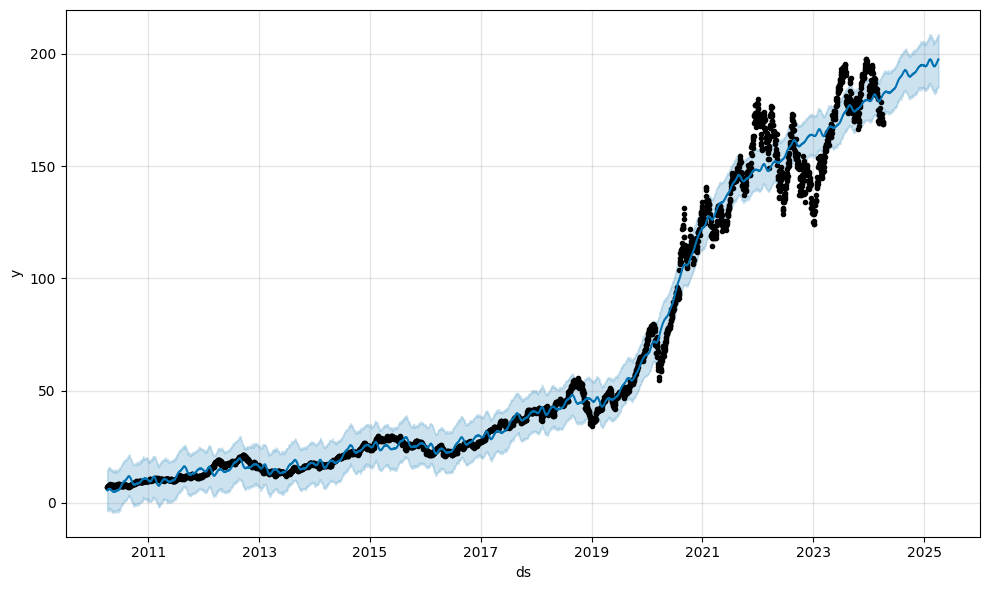

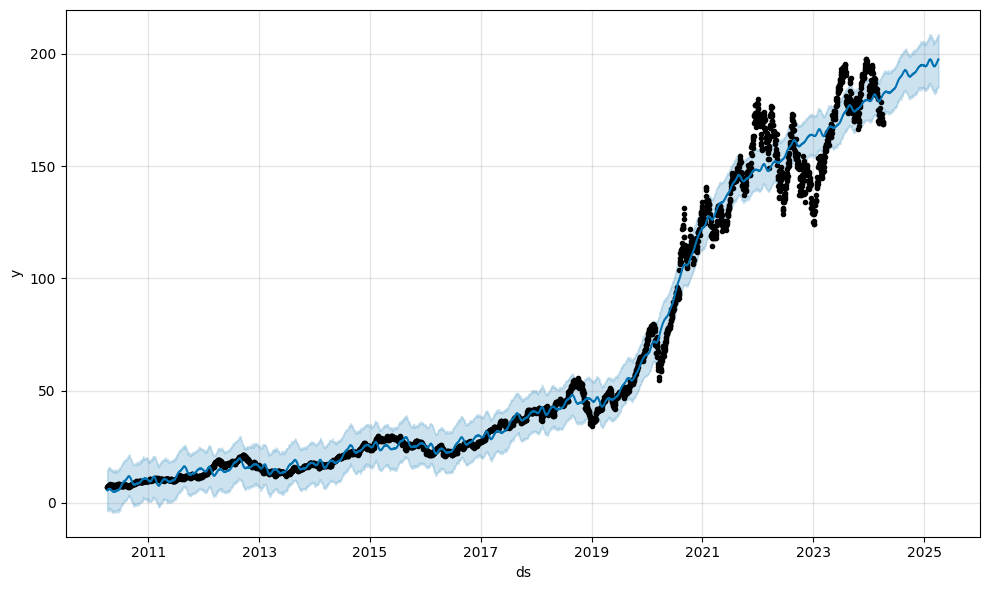

In [ ]:
from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

future = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days
forecast = model.predict(future)

model.plot(forecast)  # Plotting the forecast


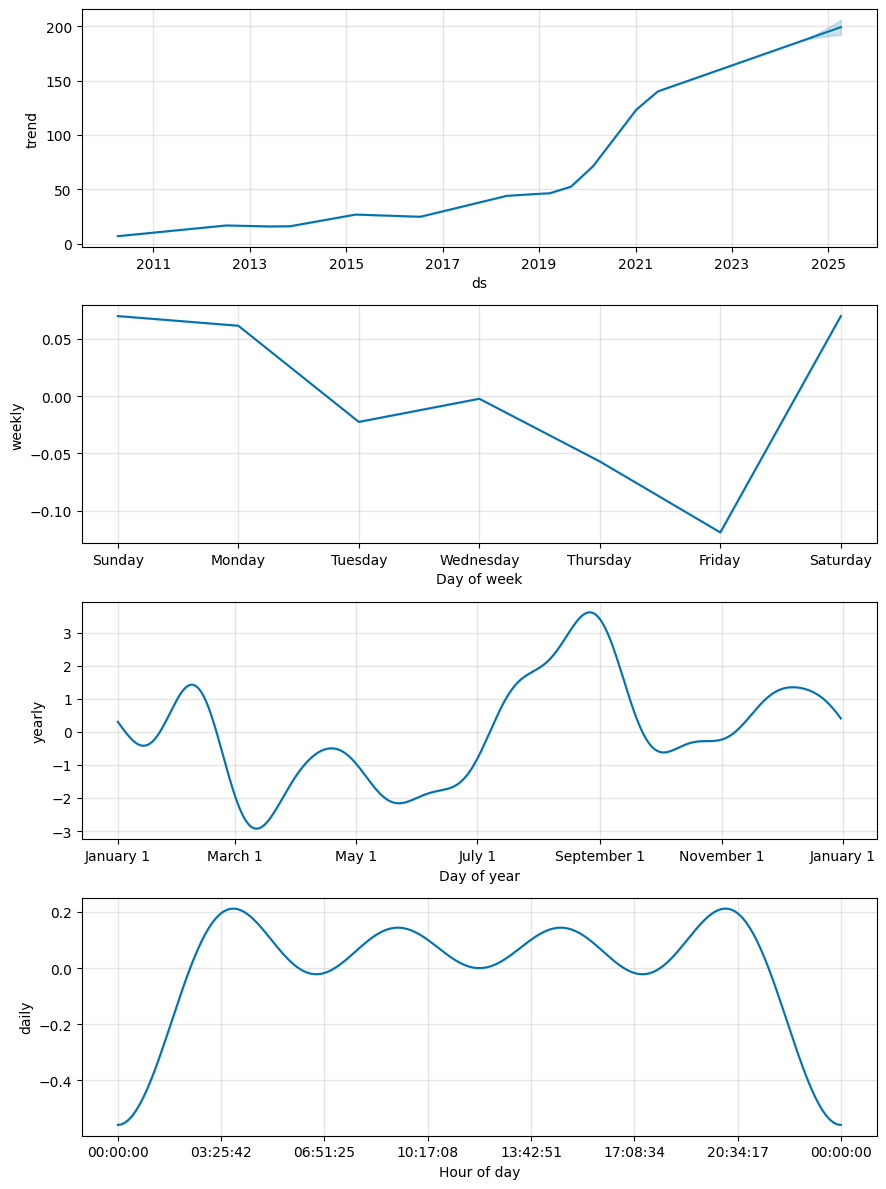

In [ ]:
fig2 = model.plot_components(forecast)